# EDA

In [1]:
library(data.table)
library(magrittr)
library(ggplot2)
library(scales)
library(stringr)
library(quanteda)
library(treemapify)
library(repr)
library(dplyr)
library(tidyr)
library(tibble)
library(gridExtra)

quanteda version 0.99.22
Using 3 of 4 threads for parallel computing

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
train <- fread('~/Documents/final project data/train.tsv', showProgress = FALSE)
dim(train)

[1] 1482535       8

In [3]:
summary(train)

    train_id           name           item_condition_id category_name     
 Min.   :      0   Length:1482535     Min.   :1.000     Length:1482535    
 1st Qu.: 370634   Class :character   1st Qu.:1.000     Class :character  
 Median : 741267   Mode  :character   Median :2.000     Mode  :character  
 Mean   : 741267                      Mean   :1.907                       
 3rd Qu.:1111900                      3rd Qu.:3.000                       
 Max.   :1482534                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:1482535     Min.   :   0.00   Min.   :0.0000   Length:1482535    
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.74   Mean   :0.4473                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :200

In [4]:
str(train)

Classes ‘data.table’ and 'data.frame':	1482535 obs. of  8 variables:
 $ train_id         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ name             : chr  "MLB Cincinnati Reds T Shirt Size XL" "Razer BlackWidow Chroma Keyboard" "AVA-VIV Blouse" "Leather Horse Statues" ...
 $ item_condition_id: int  3 3 1 1 1 3 3 3 3 3 ...
 $ category_name    : chr  "Men/Tops/T-shirts" "Electronics/Computers & Tablets/Components & Parts" "Women/Tops & Blouses/Blouse" "Home/Home Décor/Home Décor Accents" ...
 $ brand_name       : chr  "" "Razer" "Target" "" ...
 $ price            : num  10 52 10 35 44 59 64 6 19 8 ...
 $ shipping         : int  1 0 1 1 0 0 0 1 0 0 ...
 $ item_description : chr  "No description yet" "This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work"| __truncated__ "Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!" "New with tags. Leather horses. Retail for [r

In [6]:
typeof(train)
head(train,3)

[1] "list"

train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"


# The Target

In [7]:
range(train$price)

[1]    0 2009

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


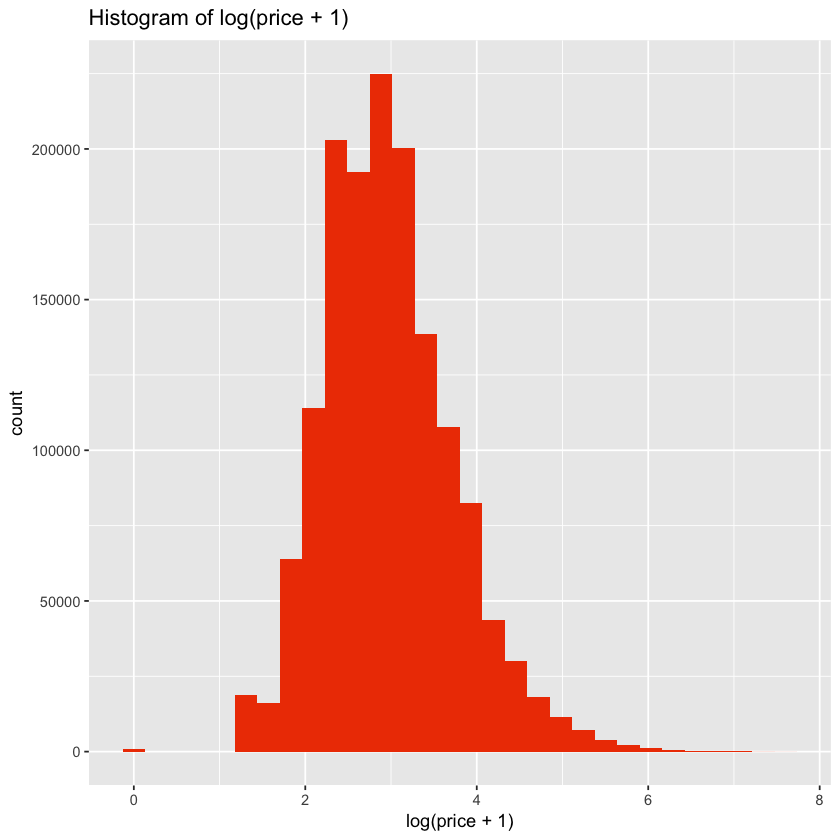

In [8]:
ggplot(data = train, aes(x = log(price+1))) + 
    geom_histogram(fill = 'orangered2') +
    labs(title = 'Histogram of log(price + 1)')

# Item Condition

In [9]:
table(train$item_condition_id)


     1      2      3      4      5 
640549 375479 432161  31962   2384 

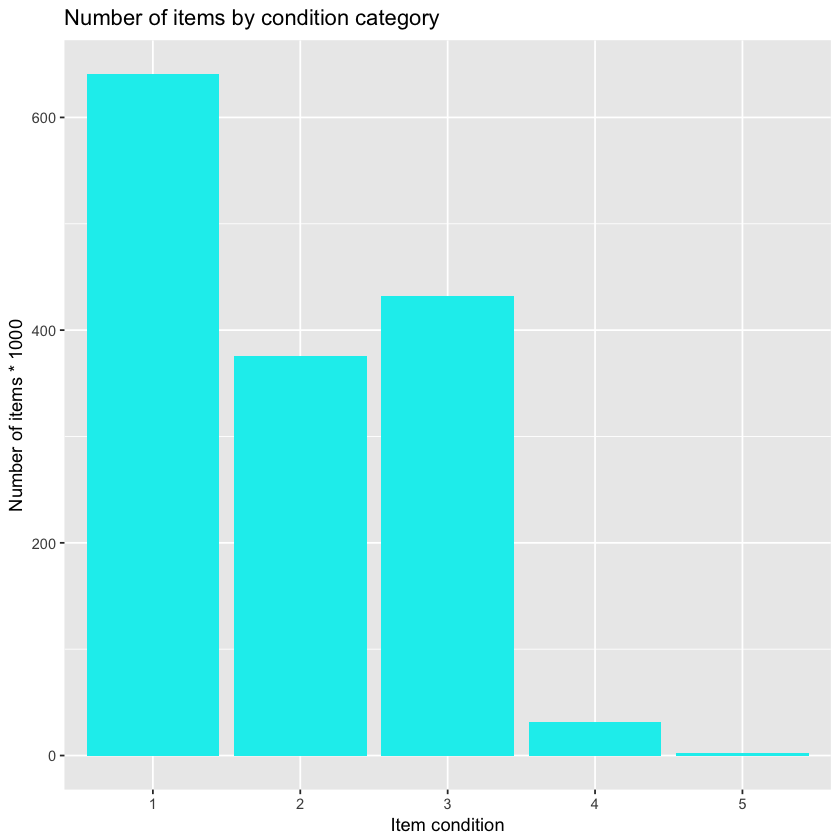

In [10]:
train[, .N, by = item_condition_id] %>%
    ggplot(aes(x = as.factor(item_condition_id), y = N/1000)) +
    geom_bar(stat = 'identity', fill = 'cyan2') + 
    labs(x = 'Item condition', y = 'Number of items * 1000', title = 'Number of items by condition category')

In [13]:
train[, .(.N, median(price)), by = item_condition_id][order(item_condition_id)]
train[, .(.N, mean(price)), by = item_condition_id][order(item_condition_id)]

item_condition_id,N,V2
1,640549,18
2,375479,17
3,432161,16
4,31962,15
5,2384,19


item_condition_id,N,V2
1,640549,26.48697
2,375479,27.56322
3,432161,26.54071
4,31962,24.34921
5,2384,31.70386


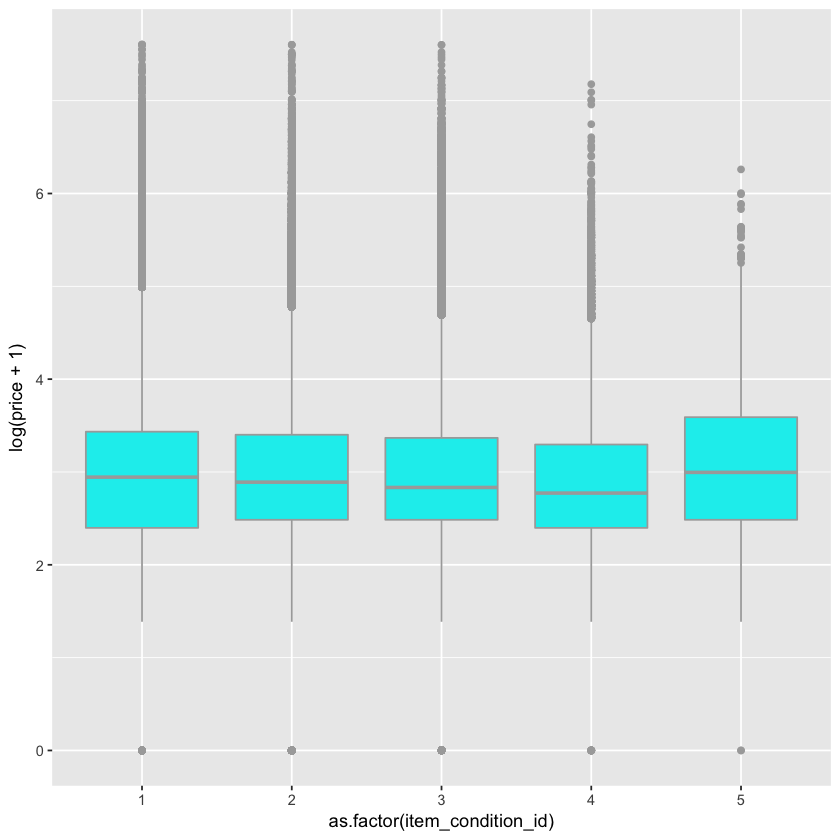

In [14]:
ggplot(data = train, aes(x = as.factor(item_condition_id), y = log(price + 1))) + 
    geom_boxplot(fill = 'cyan2', color = 'red')

# Shipping Info

In [15]:
table(train$shipping)


     0      1 
819435 663100 

My inital thought is that items where the shipping fee is paid by the seller will be higher-priced. However, there are a number of conflating factors. This may be true within specific product categories and item conditions, but not when comparing items on the aggregate. Let’s see.

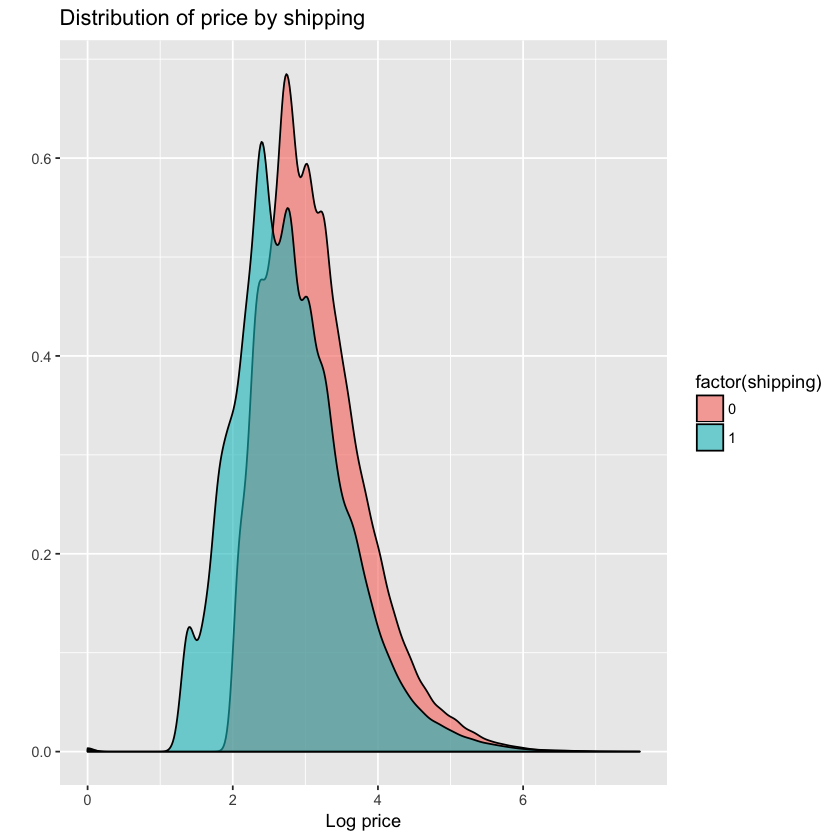

In [16]:
train %>%
    ggplot(aes(x = log(price+1), fill = factor(shipping))) + 
    geom_density(adjust = 2, alpha = 0.6) + 
    labs(x = 'Log(price+1)', y = '', title = 'Distribution of price by shipping')

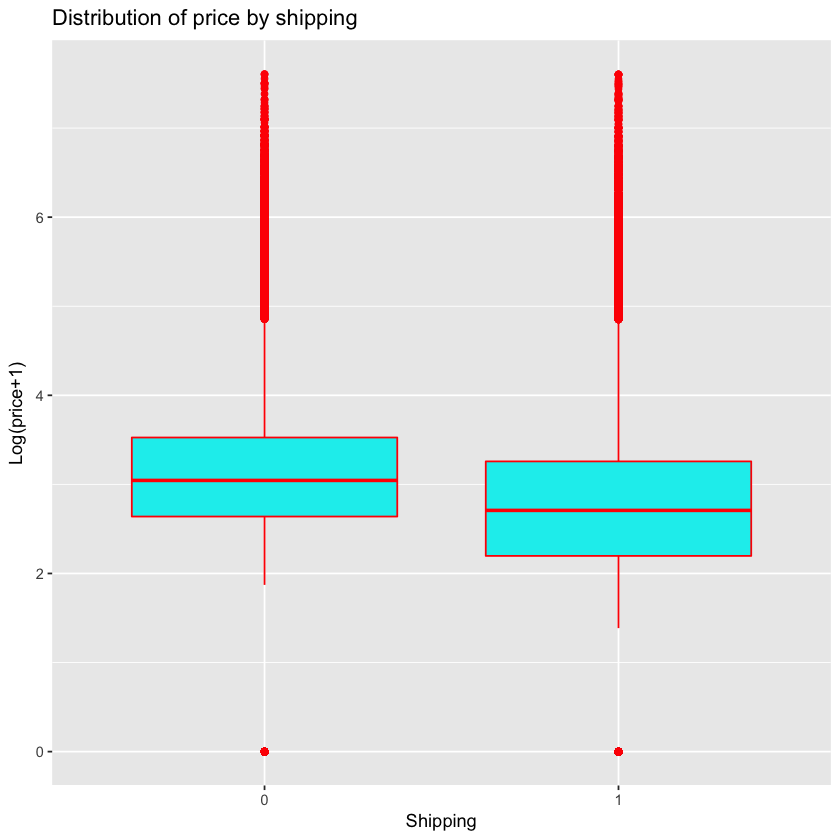

In [17]:
train %>%
    ggplot(aes(x = as.factor(shipping), y = log(price+1))) + 
    geom_boxplot(fill = 'cyan2', color = 'red') + 
    labs(x = 'Shipping', y = 'Log(price+1)', title = 'Distribution of price by shipping')

# Brand

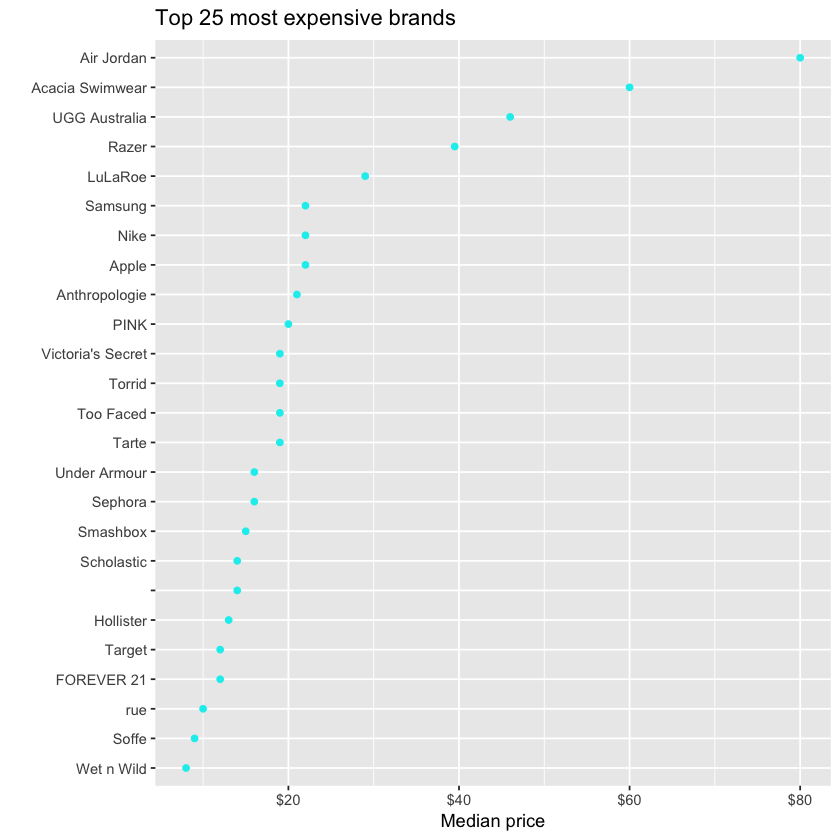

In [18]:
train[, .(median_price = median(price)), by = brand_name] %>%
    head(25) %>%
    ggplot(aes(x = reorder(brand_name, median_price), y = median_price)) + 
    geom_point(color = 'cyan2') + 
    scale_y_continuous(labels = scales::dollar) + 
    coord_flip() +
    labs(x = '', y = 'Median price', title = 'Top 25 most expensive brands') 

# Category Name

In [19]:
length(unique(train$category_name))

[1] 1288

In [23]:
x = data.frame(train, str_split_fixed(train$category_name, '/', 4)) %>%
mutate(cat1=X1, cat2=X2, cat3=X3, cat4=X4) %>% select(-X1, -X2, -X3, -X4)

x %>% summarise(Num_Cat1 = length(unique(cat1)), Num_Cat2 = length(unique(cat2)),
Num_Cat3 = length(unique(cat3)), Num_Cat4 = length(unique(cat4)))

Num_Cat1,Num_Cat2,Num_Cat3,Num_Cat4
11,114,871,8


In [24]:
sort(table(train$category_name), decreasing = TRUE)[1:10]


             Women/Athletic Apparel/Pants, Tights, Leggings 
                                                      60177 
                              Women/Tops & Blouses/T-Shirts 
                                                      46380 
                                         Beauty/Makeup/Face 
                                                      34335 
                                         Beauty/Makeup/Lips 
                                                      29910 
                   Electronics/Video Games & Consoles/Games 
                                                      26557 
                                         Beauty/Makeup/Eyes 
                                                      25215 
Electronics/Cell Phones & Accessories/Cases, Covers & Skins 
                                                      24676 
                                       Women/Underwear/Bras 
                                                      21274 
                       

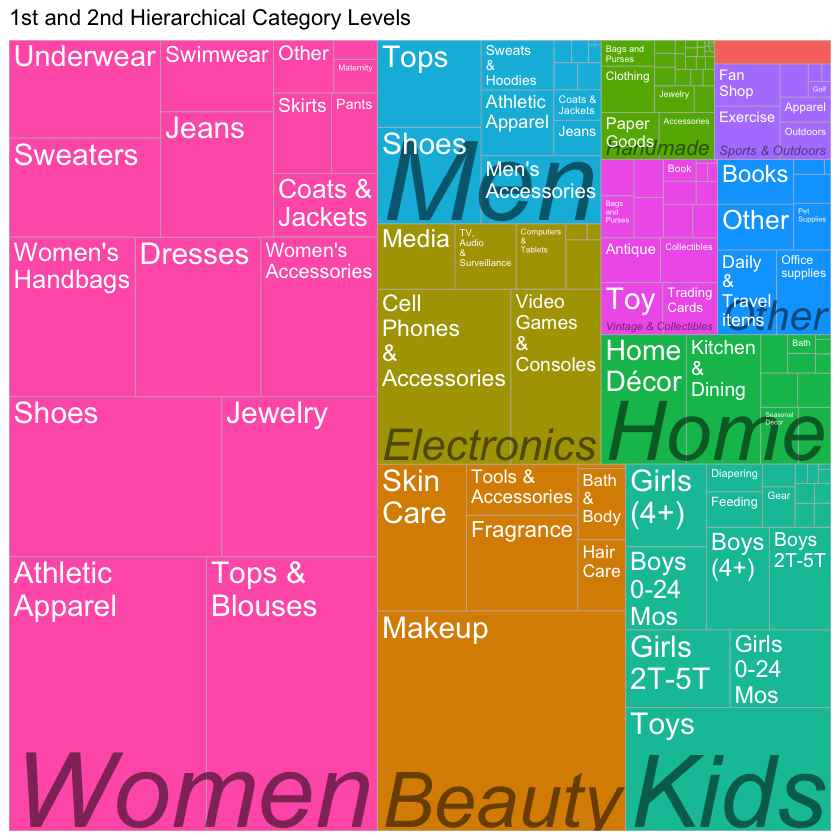

In [25]:
options(repr.plot.width=7, repr.plot.height=7)

x %>%
group_by(cat1, cat2) %>%
count() %>%
ungroup() %>%
ggplot(aes(area=n, fill=cat1, label=cat2, subgroup=cat1)) +
geom_treemap() +
geom_treemap_subgroup_text(grow = T, alpha = 0.5, colour =
                           "black", fontface = "italic", min.size = 0) +
geom_treemap_text(colour = "white", place = "topleft", reflow = T) +
theme(legend.position = "null") +
ggtitle("1st and 2nd Hierarchical Category Levels")

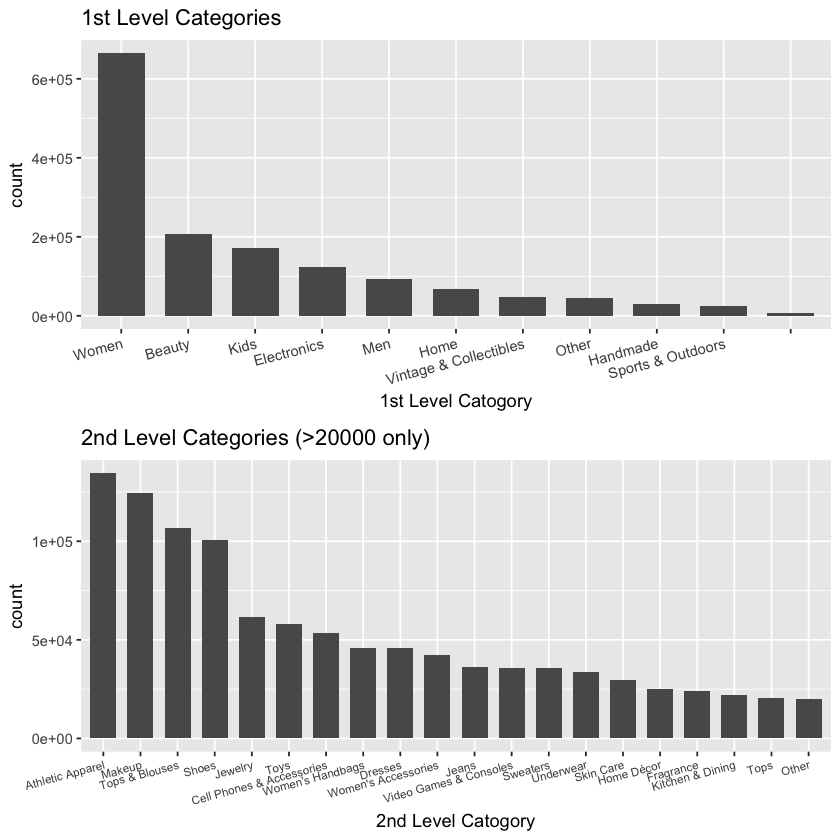

In [27]:
options(repr.plot.width=7, repr.plot.height=7)

p1 = x %>% count(cat1) %>% 
ggplot(aes(x=reorder(cat1, -n), y=n)) +
geom_bar(stat='identity', width=0.7) +
ggtitle('1st Level Categories') +
xlab('1st Level Catogory') +
ylab('count') +
theme(axis.text.x=element_text(angle=15, hjust=1))

p2 = x %>% count(cat2) %>% 
filter(n>20000) %>% 
ggplot(aes(x=reorder(cat2,-n), y=n)) +
geom_bar(stat='identity', width=0.7) +
ggtitle('2nd Level Categories (>20000 only)') +
xlab('2nd Level Catogory') +
ylab('count') +
theme(axis.text.x=element_text(angle=15, hjust=1, size=7))

grid.arrange(p1, p2, ncol=1)

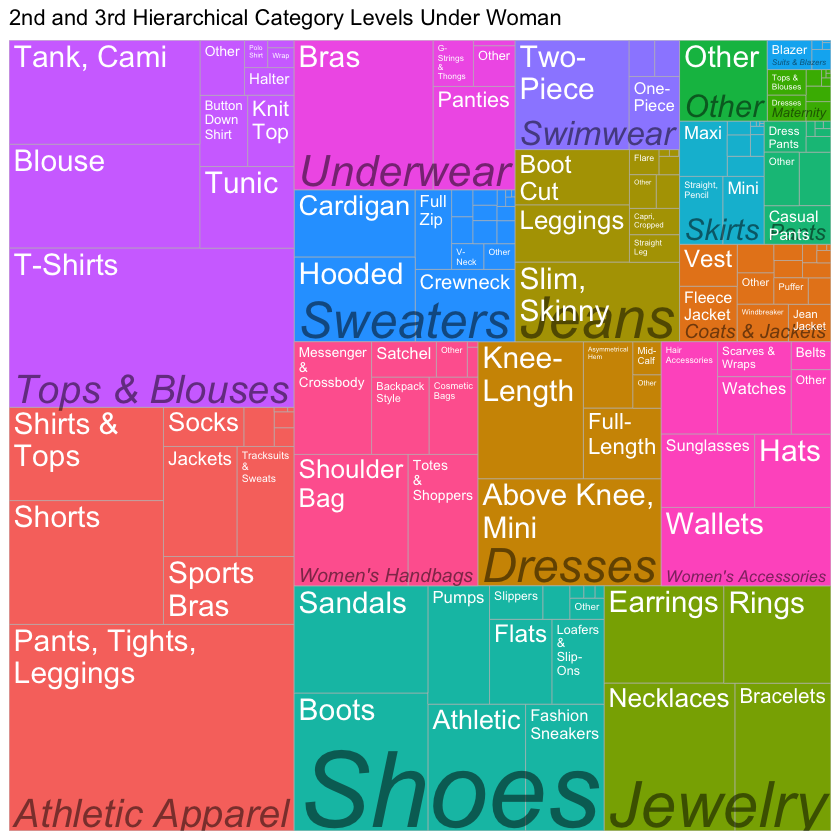

In [28]:
options(repr.plot.width=7, repr.plot.height=7)

x %>% filter(cat1=='Women') %>% 
group_by(cat2, cat3) %>%
count() %>%
ungroup() %>%
ggplot(aes(area=n, fill=cat2, label=cat3, subgroup=cat2)) +
geom_treemap() +
geom_treemap_subgroup_text(grow = T, alpha = 0.5, colour =
                           "black", fontface = "italic", min.size = 0) +
geom_treemap_text(colour = "white", place = "topleft", reflow = T) +
theme(legend.position = "null") +
ggtitle("2nd and 3rd Hierarchical Category Levels Under Woman")

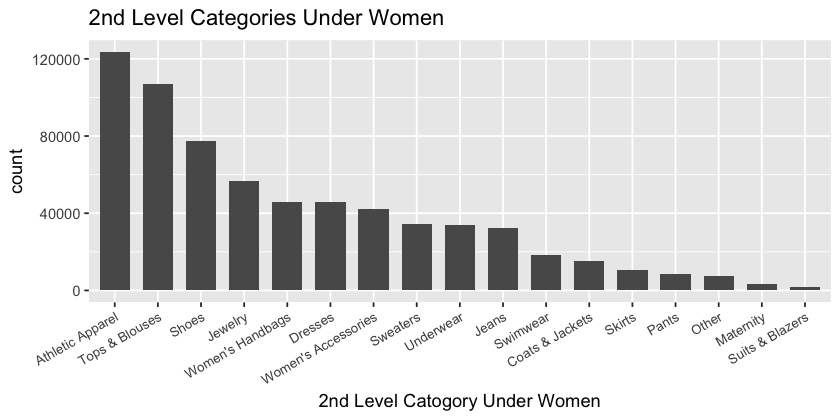

In [29]:
options(repr.plot.width=7, repr.plot.height=3.5)

x %>% filter(cat1=='Women') %>%
count(cat2) %>% 
ggplot(aes(x=reorder(cat2, -n), y=n)) +
geom_bar(stat='identity', width=0.7) +
ggtitle('2nd Level Categories Under Women') +
xlab('2nd Level Catogory Under Women') +
ylab('count') +
theme(axis.text.x=element_text(angle=30, hjust=1, size=8))

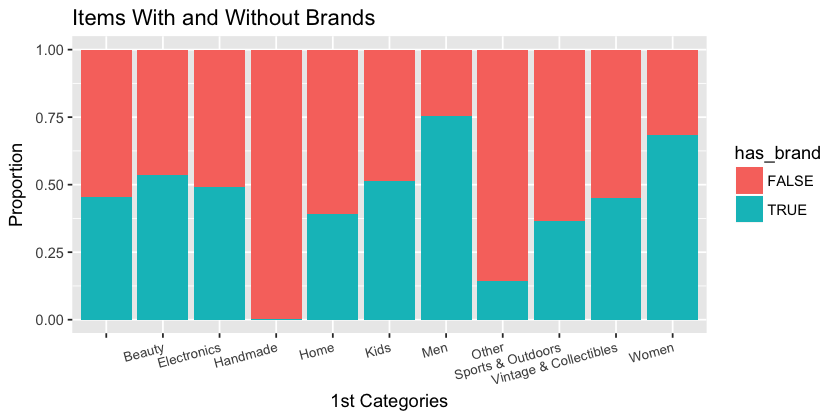

In [30]:
options(repr.plot.width=7, repr.plot.height=3.5)

x = x %>% mutate(has_brand=(brand_name!=''))
x %>%
ggplot(aes(x=cat1, fill=has_brand)) +
geom_bar(position='fill') +
theme(axis.text.x=element_text(angle=15, hjust=1, size=8)) +
xlab('1st Categories') +
ylab('Proportion') +
ggtitle('Items With and Without Brands')

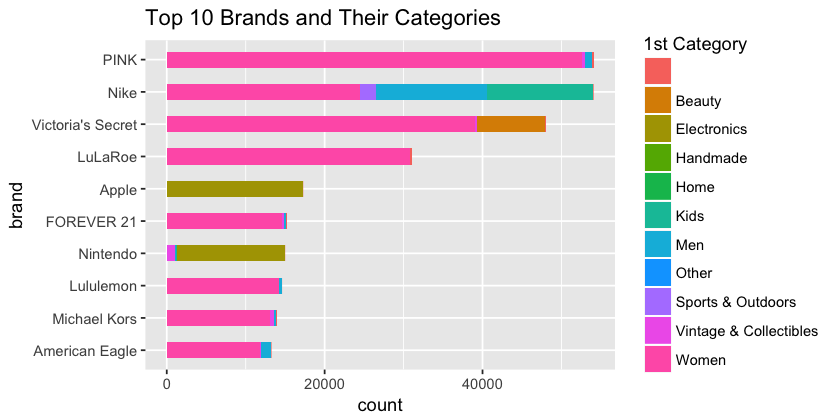

In [31]:
options(repr.plot.width=7, repr.plot.height=3.5)

top10 = x %>% filter(brand_name!='') %>% 
count(brand_name) %>%
arrange(desc(n)) %>%
head(10)

x %>% filter(brand_name %in% top10$brand_name) %>%
ggplot(aes(x=factor(brand_name, levels=rev(top10$brand_name)), fill=cat1)) +
geom_bar(width=0.5) +
coord_flip() +
xlab('brand') +
labs(fill='1st Category') +
ggtitle('Top 10 Brands and Their Categories')

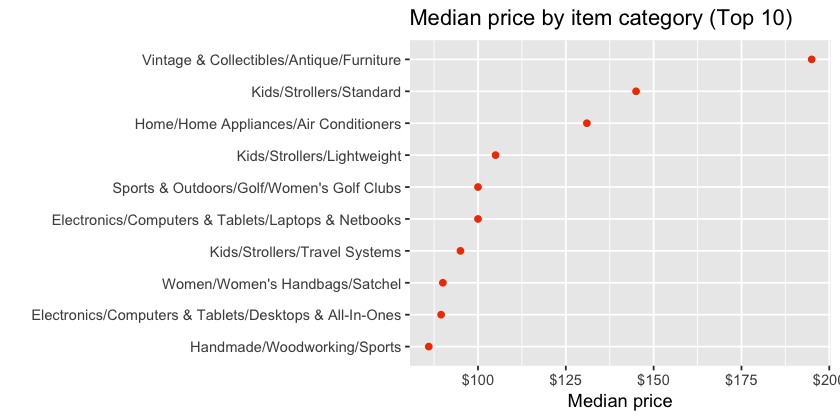

In [32]:
train[, .(median = median(price)), by = category_name][order(median, decreasing = TRUE)][1:10] %>%
    ggplot(aes(x = reorder(category_name, median), y = median)) + 
    geom_point(color = 'orangered2') + 
    coord_flip() + 
    labs(x = '', y = 'Median price', title = 'Median price by item category (Top 10)') + 
    scale_y_continuous(labels = scales::dollar)

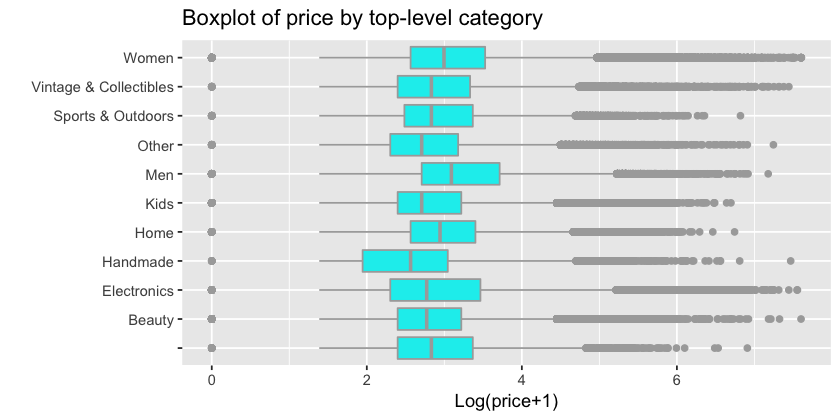

In [35]:
x %>%
    ggplot(aes(x = cat1, y = log(price+1))) + 
    geom_boxplot(fill = 'cyan2', color = 'darkgrey') + 
    coord_flip() + 
    labs(x = '', y = 'Log(price+1)', title = 'Boxplot of price by top-level category')

In [36]:
# get number of unique level 2 categories
length(unique(x$cat2))

[1] 114

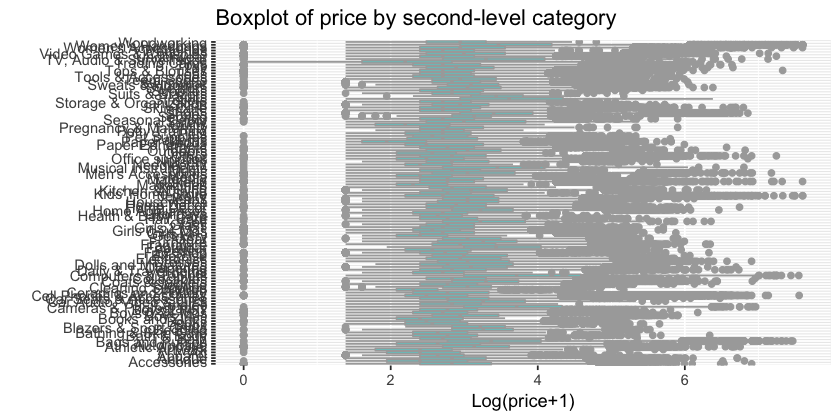

In [37]:
x %>%
    ggplot(aes(x = cat2, y = log(price+1))) + 
    geom_boxplot(fill = 'cyan2', color = 'darkgrey') + 
    coord_flip() + 
    labs(x = '', y = 'Log(price+1)', title = 'Boxplot of price by second-level category')

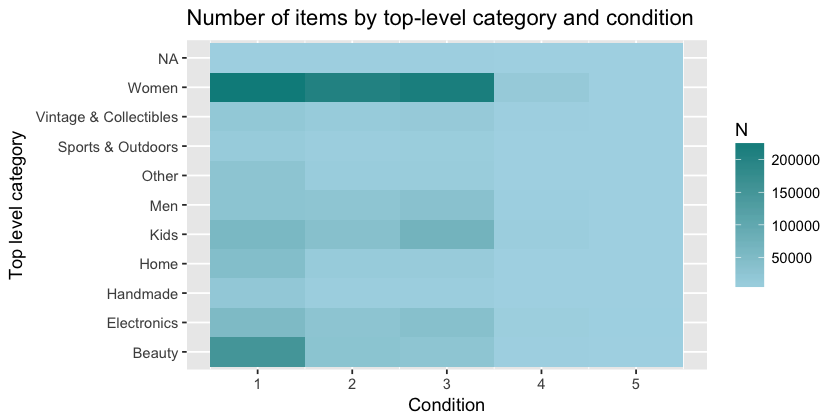

In [41]:
train[, .(.N, median_price = median(price)), by = c('level_1_cat', 'item_condition_id')] %>%
    ggplot(aes(x = item_condition_id, y = level_1_cat, fill = N)) + 
    geom_tile() + 
    scale_fill_gradient(low = 'lightblue', high = 'cyan4') + 
    labs(x = 'Condition', y = 'Top level category', title = 'Number of items by top-level category and condition')

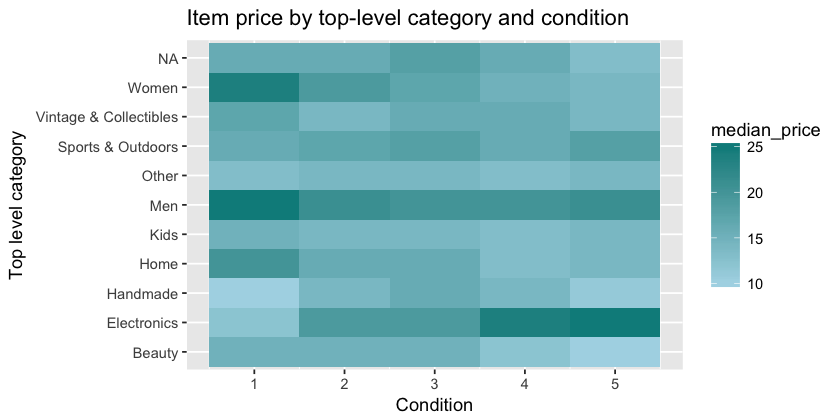

In [42]:
train[, .(median_price = median(price)), by = c('level_1_cat', 'item_condition_id')] %>%
    ggplot(aes(x = item_condition_id, y = level_1_cat, fill = median_price)) + 
    geom_tile() + 
    scale_fill_gradient(low = 'lightblue', high = 'cyan4') + 
    labs(x = 'Condition', y = 'Top level category', title = 'Item price by top-level category and condition')

# Item Description

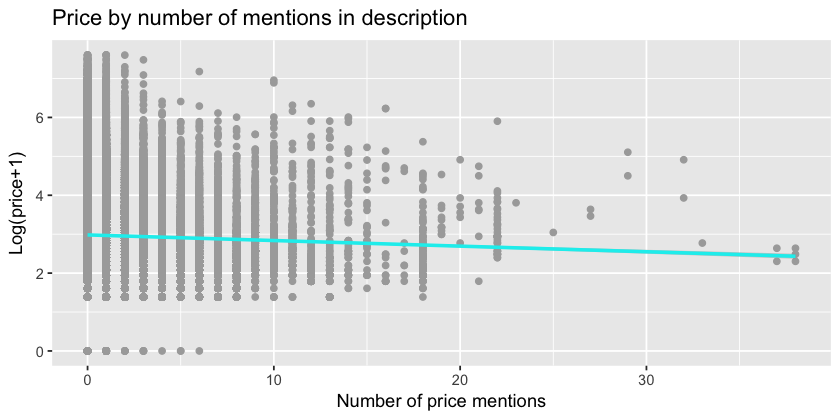

In [45]:
# Number of times price is mentioned in descritption
train[, pr_mentions := str_count(item_description, "\\[rm\\]")]

train %>%
    ggplot(aes(x = pr_mentions, y = log(price+1))) +
    geom_point(color = 'darkgrey') + 
    geom_smooth(method = 'lm', color = 'cyan2') +
    labs(x = 'Number of price mentions', y = 'Log(price+1)', title = 'Price by number of mentions in description')

In [46]:
# calculate description length
train[, desc_length := nchar(item_description)]

# set desc_length to NA where no description exists
train[item_description == 'No description yet', desc_length := NA]

cor(train$desc_length, train$price, use = 'complete.obs')

[1] 0.04417687

In [47]:
train[item_description == 'No description yet', item_description := NA]

dcorpus <- corpus(train$item_description)

summary(dcorpus)

,Text,Types,Tokens,Sentences
text1,text1,1,1,0
text2,text2,32,39,3
text3,text3,26,32,2
text4,text4,34,41,8
text5,text5,5,5,1
text6,text6,17,20,1
text7,text7,14,15,1
text8,text8,46,58,2
text9,text9,9,10,2
text10,text10,54,64,6


In [49]:
options(width = 200)
kwic(dcorpus, phrase("Kate Spade"), valuetype = "fixed") %>%
    head()

docname,from,to,pre,keyword,post
text151,6,7,"Your ever-faithful companion , the",Kate Spade,New York ® Cobble Hill
text216,1,2,,KATE SPADE,Glitter Bug Wristlet Rose Gold
text216,17,18,7 Case Purse Bag NWT,Kate Spade,New York wristlet in Rose
text599,5,6,Black and Polka Dot,Kate Spade,Wallet Authentic Small crack in
text781,21,22,to just set around .,Kate Spade,Wellesley Small Rachelle Satchel Bag
text792,9,10,And Gift Box new !,Kate spade,mug Waterford crystal wine stopper


In [50]:
dfm1 <- dfm(
    dcorpus, 
    ngrams = 1, 
    remove = c("rm", stopwords("english")),
    remove_punct = TRUE,
    remove_numbers = TRUE,
    stem = TRUE)

# N-grams Top 25

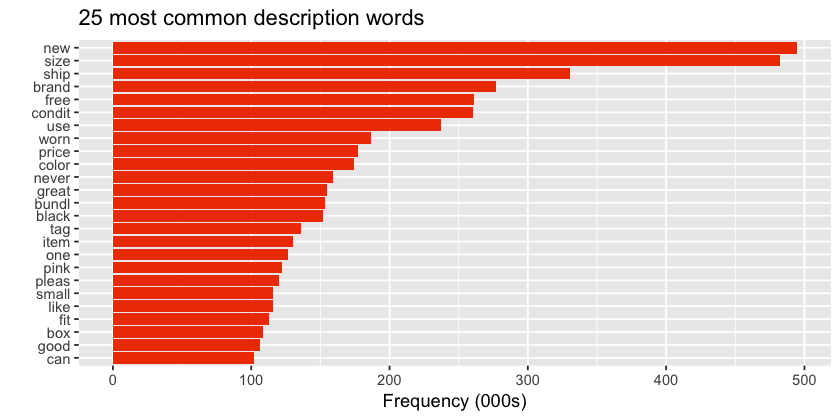

In [51]:
tf <- topfeatures(dfm1, n = 25)

# convert to df and plot
data.frame(term = names(tf), freq = unname(tf)) %>%
    ggplot(aes(x = reorder(term, freq), y = freq/1000)) + 
    geom_bar(stat = 'identity', fill = 'orangered2') + 
    labs(x = '', y = 'Frequency (000s)', title = '25 most common description words') + 
    coord_flip()

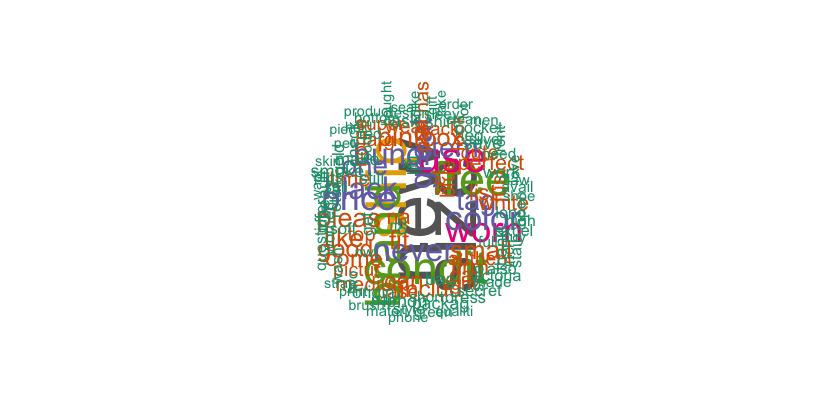

In [55]:
set.seed(100)
textplot_wordcloud(dfm1, min.freq = 3e4, random.order = FALSE,
                   rot.per = .25, 
                   colors = RColorBrewer::brewer.pal(8,"Dark2"))

In [58]:
dfm2 <- dcorpus %>%
    corpus_sample(size = floor(ndoc(dcorpus) * 0.15)) %>%
    dfm(
        ngrams = 2,
        ignoredFeatures = c("rm", stopwords("english")),
        remove_punct = TRUE,
        remove_numbers = TRUE,
        concatenator = " "
    )

Warning message:
“Argument ignoredFeatures not used.”

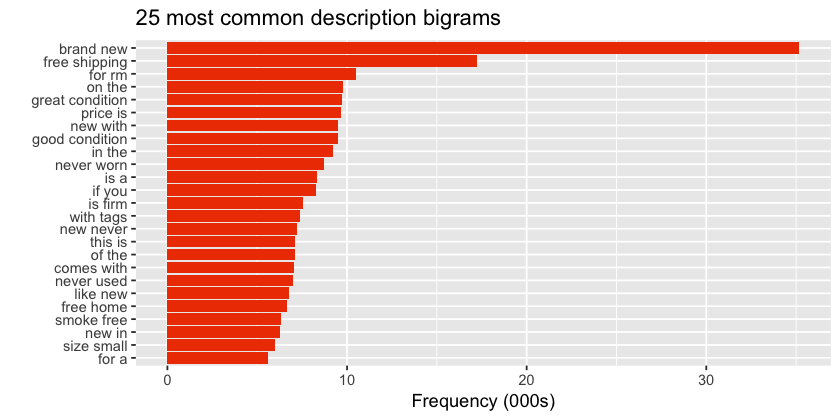

In [59]:
tf <- topfeatures(dfm2, n = 25)

# convert to df and plot
data.frame(term = names(tf), freq = unname(tf)) %>%
    ggplot(aes(x = reorder(term, freq), y = freq/1000)) + 
    geom_bar(stat = 'identity', fill = 'orangered2') + 
    labs(x = '', y = 'Frequency (000s)', title = '25 most common description bigrams') + 
    coord_flip() 

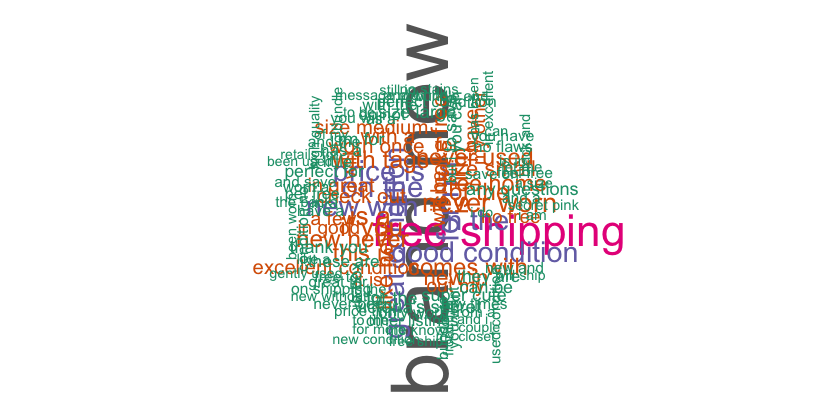

In [60]:
set.seed(100)
textplot_wordcloud(dfm2, min.freq = 2000, random.order = FALSE,
                   rot.per = .25, 
                   colors = RColorBrewer::brewer.pal(8,"Dark2"))

In [61]:
dfm3 <- dcorpus %>%
    corpus_sample(size = floor(ndoc(dcorpus) * 0.15)) %>%
    dfm(
        ngrams = 3,
        ignoredFeatures = c("rm", stopwords("english")),
        remove_punct = TRUE,
        remove_numbers = TRUE,
        concatenator = " "
    )

Warning message:
“Argument ignoredFeatures not used.”

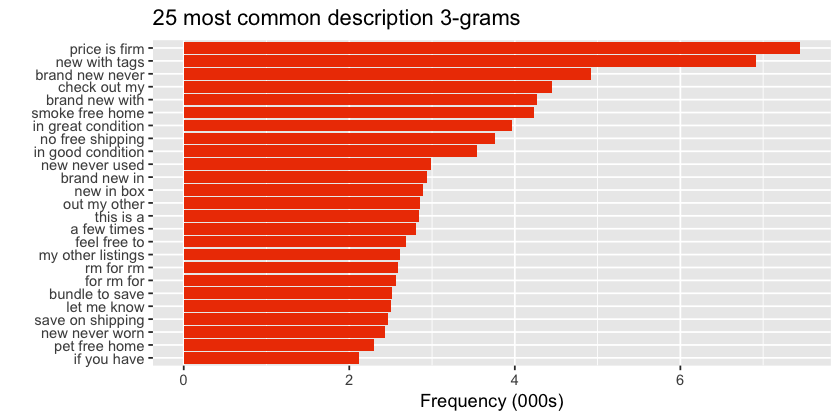

In [62]:
tf <- topfeatures(dfm3, n = 25)

# convert to df and plot
data.frame(term = names(tf), freq = unname(tf)) %>%
    ggplot(aes(x = reorder(term, freq), y = freq/1000)) + 
    geom_bar(stat = 'identity', fill = 'orangered2') + 
    labs(x = '', y = 'Frequency (000s)', title = '25 most common description 3-grams') + 
    coord_flip()

Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“shipping brand new could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“and smoke free could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“couple of times could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“brand new authentic could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“next business day could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“victoria secret pink could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“not responsible for could not be fit on page. It will not be plotted.”Warning me

“willing to bundle could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“so i can could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“anastasia beverly hills could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“shown in picture could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“will be blocked could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“they are in could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“super soft and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“offers will be could not be

“message me with could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“out my page could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“bath body works could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“wear on the could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“free smoke free could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“message me if could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“6s plus iphone could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“firm unless bundled could not be fit 

“of them are could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“i do bundle could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“send me a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“iphone iphone plus could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“free and pet could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“read my profile could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“condition like new could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“really good condition could not be fi

“new high quality could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“new in original could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“other items to could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“brand new high could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“easy to use could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“the front and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“the north face could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“shipping check out could not be fi

“once and washed could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“a message and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“of jewelry rm could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“and comes with could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“don't hesitate to could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“be shipped in could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“my rm pieces could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“rm pieces of could not be fit on p

“new worn once could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“sitting in my could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“shipping bundle and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“stain on the could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“has a little could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“jewelry rm of could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“rm of my could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“a free gift could not be fit on page. It 

“new item and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“come with new could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“is a beautiful could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“to get order could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“for stopping by could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“edge s6 edge could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“before you buy could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“no rips tears could not be fit on page.

“for all skin could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“with lots of could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“could fit a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“iphone se 5s could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“galaxy note note could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“in the dark could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“a set of could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“looks brand new could not be fit on page. It will

“will ship same could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“has not been could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“my store for could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“4s ipod touch could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“s7 edge s6 could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“price firm unless could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“included in the could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“to try on could not be fit on page. It

“makes a great could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“does have a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“it was a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“in fair condition could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“size after you could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“i love this could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“selling as a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“packaged with care could not be fit on page. 

“nwot never worn could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“usps ups fedex could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“the same time could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“great condition with could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“worn as a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“me and i could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“make sure your could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“in the middle could not be fit on page

“are new and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“super cute with could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“it authentic yeah could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“package includes x could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“please see pictures could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“made in italy could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“item has been could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“will come in could not be

“pet free and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“super cute for could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“out my listings could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“perfect for spring could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“good condition some could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“are looking for could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“other colors available could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“for any occasion

“free shipping but could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“blue and black could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“free ship price could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“does have some could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“worn smoke free could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“sale sale sale could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“is new and could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“i need to could not be fit on pa

“or free shipping could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“a great day could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“has some wear could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“for the price could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“never worn before could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“without tags size could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“holds no free could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“ship within 4-5 could not be fi

“on each side could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“a bundle for could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“perfect condition never could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“rm or rm could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“no longer have could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“s4 s3 htc could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“box never opened could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“perfect gift for could not be fit on 

“cleaning out my could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“never worn perfect could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“trades or holds could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“also have a could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“as seen on could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“but if you could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“get my order could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“and there is could not be fit on page. I

“can bundle with could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“size m l could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“size large color could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“other items i could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“plenty of life could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“size small black could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“free to comment could not be fit on page. It will not be plotted.”Warning message in wordcloud::wordcloud(featnames(x), colSums(x), ...):
“i ship out could not be fit on pag

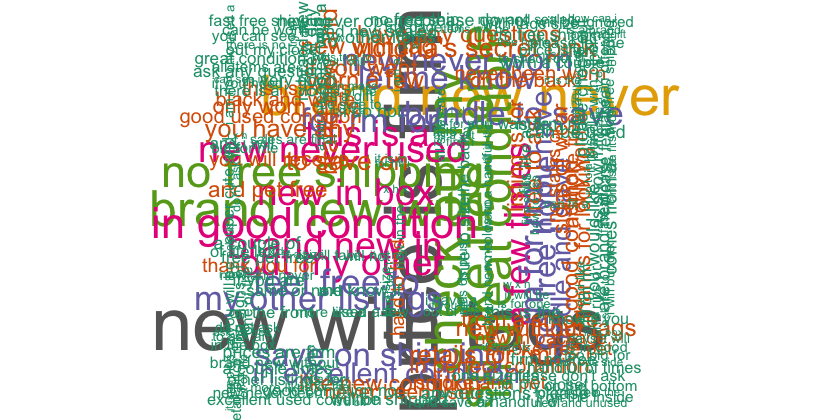

In [63]:
set.seed(100)
textplot_wordcloud(dfm3, min.freq = 100, random.order = FALSE,
                   rot.per = .25, 
                   colors = RColorBrewer::brewer.pal(8,"Dark2"))

In [65]:
# Add other features as docvars
docvars(dcorpus, "price") <- train$price
docvars(dcorpus, "brand_name") <- train$brand_name
docvars(dcorpus, "item_condition_id") <- train$item_condition_id
docvars(dcorpus, "level_1_cat") <- train$level_1_cat
docvars(dcorpus, "level_2_cat") <- train$level_2_cat

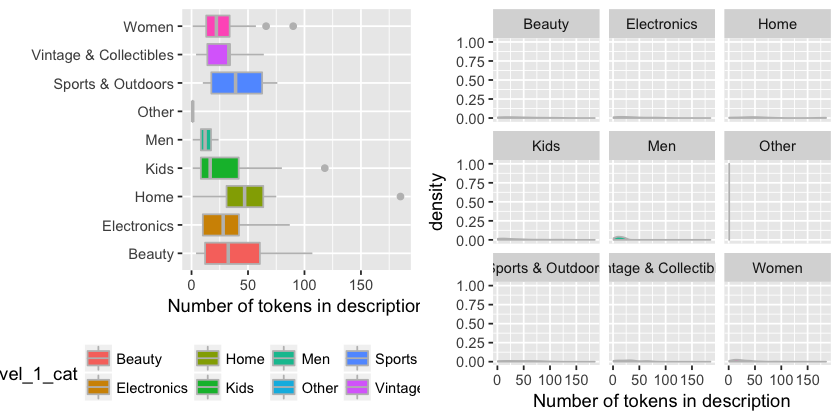

In [66]:
p1 <- summary(dcorpus) %>%
    ggplot(aes(x = level_1_cat, y = Tokens)) +
    geom_boxplot(aes(fill = level_1_cat), color = 'grey') +
    coord_flip() +
    theme(legend.position = 'bottom') + 
    labs(x = '', y = 'Number of tokens in description')

p2 <- summary(dcorpus) %>%
    ggplot(aes(x = Tokens)) +
    geom_density(aes(fill = level_1_cat), color = 'grey') + 
    facet_wrap(~level_1_cat) + 
    theme(legend.position = "none") + 
    labs(x = 'Number of tokens in description')

grid.arrange(p1, p2, ncol = 2)

In [70]:
dim(x)
head(x,2)

[1] 1482535      13

train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,cat4,has_brand
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet,Men,Tops,T-shirts,,FALSE
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,,TRUE


In [71]:
data = x[,-13]

In [75]:
?write.csv

In [77]:
write.csv(data,"~/Documents/final project data/data.csv", row.names=FALSE)